# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [5]:
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, ColumnTransformer

In [6]:
penguins_df = load_penguins()
penguins_df = penguins_df.dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [14]:
ct = ColumnTransformer(
    [
        ('dummify', OneHotEncoder(sparse_output= False,
        handle_unknown= 'ignore'), make_column_selector(dtype_include=object))
    ],
    remainder = 'passthrough'
)

dummy_pipeline = Pipeline(
    [
        ('preprocessing', ct)

    ]
)

X = penguins_df.drop(["bill_depth_mm"], axis = 1)
y = penguins_df["bill_depth_mm"]

dummy_pipeline.fit(X)

names = dummy_pipeline.named_steps["preprocessing"].get_feature_names_out()
names

array(['dummify__species_Adelie', 'dummify__species_Chinstrap',
       'dummify__species_Gentoo', 'dummify__island_Biscoe',
       'dummify__island_Dream', 'dummify__island_Torgersen',
       'dummify__sex_female', 'dummify__sex_male',
       'remainder__bill_length_mm', 'remainder__flipper_length_mm',
       'remainder__body_mass_g', 'remainder__year'], dtype=object)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## Linear Regression Model

In [15]:
X = penguins_df.drop("bill_depth_mm", axis = 1)
y = penguins_df["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 40)

In [18]:
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("regression", LinearRegression())]
)

linear_model = lr_pipeline.fit(X_train,y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

train_lr_mse = mean_squared_error(y_train, y_train_pred)
test_lr_mse = mean_squared_error(y_test, y_test_pred)

print(train_lr_mse.round(4))
print(test_lr_mse.round(4))

0.5808
0.7026


## KNN Model K = 3

In [19]:
knn3_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("knn3", KNeighborsRegressor(n_neighbors= 3))
    ]
)

knn3_model = knn3_pipeline.fit(X_train, y_train)

pred_knn3_train = knn3_model.predict(X_train)
pred_knn3_test = knn3_model.predict(X_test)

train_knn3_mse = mean_squared_error(y_train, pred_knn3_train)
test_knn3_mse = mean_squared_error(y_test, pred_knn3_test)

print(train_knn3_mse.round(4))
print(test_knn3_mse.round(4))

1.1156
2.7379


## KNN Model K = 10

In [20]:
knn10_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("knn10", KNeighborsRegressor(n_neighbors= 10))
    ]
)

knn10_model = knn10_pipeline.fit(X_train, y_train)

pred_knn10_train = knn10_model.predict(X_train)
pred_knn10_test = knn10_model.predict(X_test)

train_knn10_mse = mean_squared_error(y_train, pred_knn10_train)
test_knn10_mse = mean_squared_error(y_test, pred_knn10_test)

print(train_knn10_mse.round(4))
print(test_knn10_mse.round(4))

1.7774
2.6762


## Decision Tree

In [29]:
decision_pipeline = Pipeline(
    [
        ('preprocessing', ct),
        ('decision_tree', DecisionTreeRegressor())
    ]
)

tree_model = decision_pipeline.fit(X_train, y_train)

pred_tree_train = tree_model.predict(X_train)
pred_tree_test = tree_model.predict(X_test)

train_tree_mse = mean_squared_error(y_train, pred_tree_train)
test_tree_mse = mean_squared_error(y_test, pred_tree_test)

print(train_tree_mse)
print(test_tree_mse)

0.0
1.1838805970149258


In [31]:
MSE_table = pd.DataFrame({
"Model": ["Linear","KNN (K=3)", "KNN (K=10)", "Decision Tree"],
"Train MSE": [train_lr_mse,train_knn3_mse, train_knn10_mse, train_tree_mse],
"Test MSE": [test_lr_mse, test_knn3_mse, test_knn10_mse, test_tree_mse],
})

MSE_table

,Model,Train MSE,Test MSE
0,Linear,0.580835,0.702609
1,KNN (K=3),1.115618,2.737877
2,KNN (K=10),1.777403,2.676225
3,Decision Tree,0.000000,1.183881


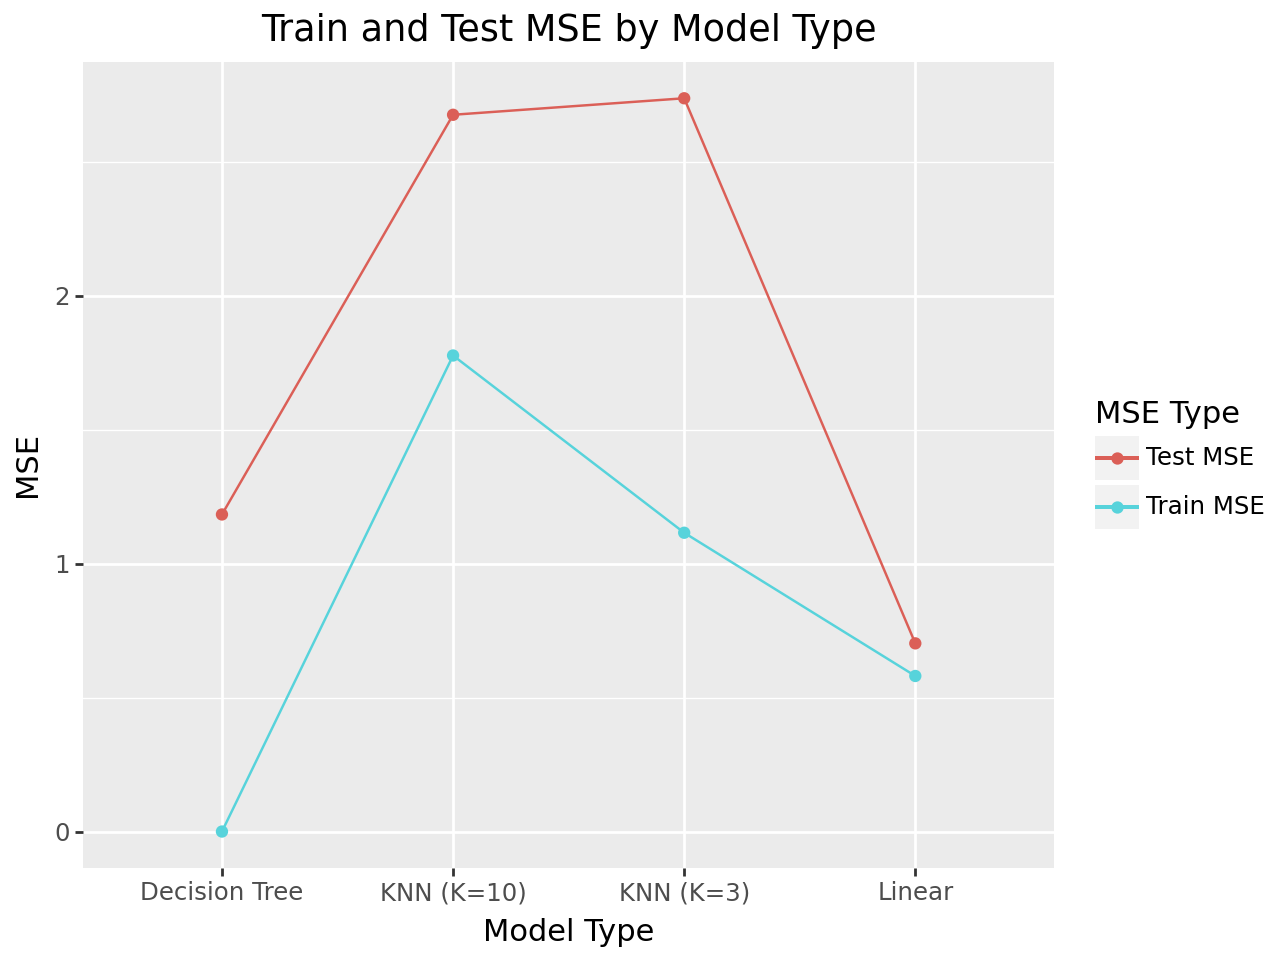

In [47]:
from plotnine import *

MSE_long = MSE_table.melt(id_vars="Model", value_vars=["Train MSE", "Test MSE"],
                            var_name="MSE Type", value_name="MSE")

(ggplot(MSE_long, aes(x = 'Model', y = 'MSE', group = 'MSE Type', color = 'MSE Type')) +
geom_line() +
geom_point() +
labs(x = 'Model Type', y = 'MSE', title = 'Train and Test MSE by Model Type')
)

As we can see in the plot above, the model that has the lowest MSE for the test data is the linear model. This indicates that this is the model that best fits the data. The decision tree was the next best predictor of the data and the KNN with k=3 was the worst predictor. 